In [3]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
print(iris['frame'].head(20))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [7]:
print(iris.target)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


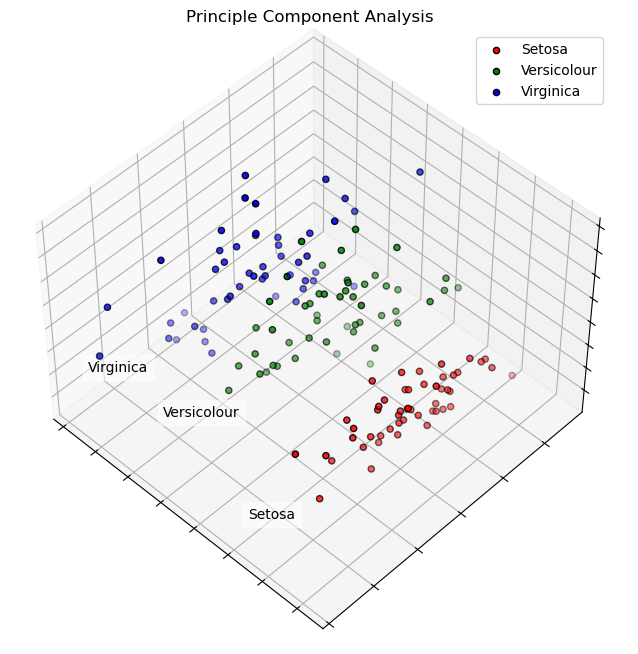

In [12]:
import numpy as np
from sklearn import datasets, decomposition

np.random.seed(5)

X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# Define colors for the clusters
colors = ["r", "g", "b"]

for name, label, color in zip(["Setosa", "Versicolour", "Virginica"], [0, 1, 2], colors):
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
    ax.scatter(X[y == label, 0], X[y == label, 1], X[y == label, 2], c=color, label=name, edgecolor="k")

ax.set_title("Principle Component Analysis")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])


plt.legend()
plt.show()


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Splitting the dataset into the Training set and Test set
X = iris_df.iloc[:, [0, 1, 2, 3]].values
y = iris_df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

# Check the accuracy on the test set
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


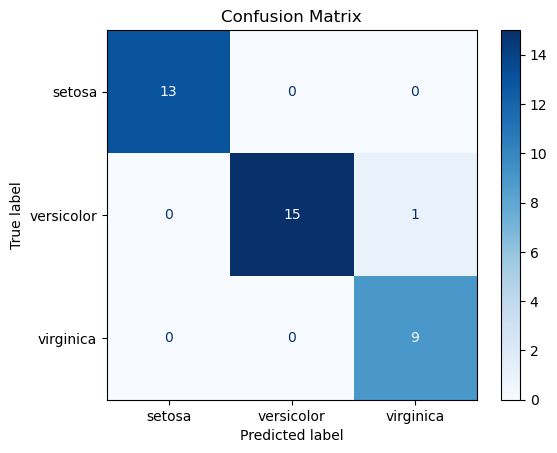

Accuracy: 0.97


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Check the accuracy on the test set
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


LDA Accuracy: 0.97


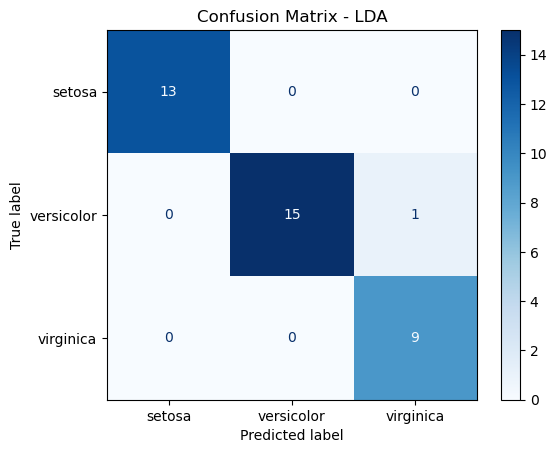

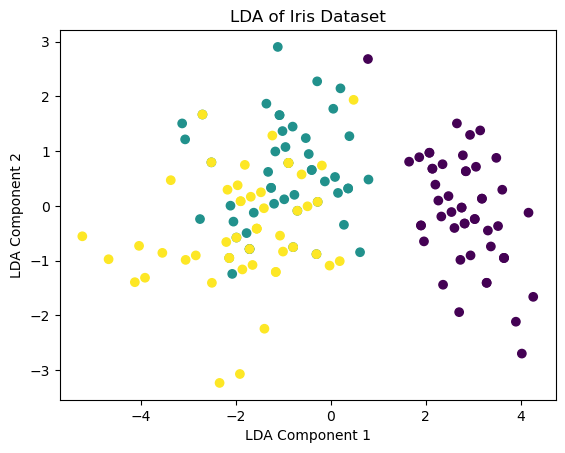

In [62]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=2)

X___r = lda.fit(X_train, y_train).transform(X_train)

# Calculate accuracy on the test set
accuracy_lda = lda.score(X_test, y_test)
print(f'LDA Accuracy: {accuracy_lda:.2f}')

# Predicting the test set results
y_pred_lda = lda.predict(X_test)
X_r = lda.fit(X, y).transform(X)

# Confusion Matrix for LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred = lda.predict(X)
cm = confusion_matrix(y, y_pred)
cm_lda = confusion_matrix(y_test, y_pred_qda)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=iris.target_names)
disp_lda.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LDA")
plt.show()




# Scatter plot
plt.scatter(X_r[:, 0], X_r[:, 1], c=y, cmap='viridis')
plt.title("LDA of Iris Dataset")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()


QDA Accuracy: 0.97


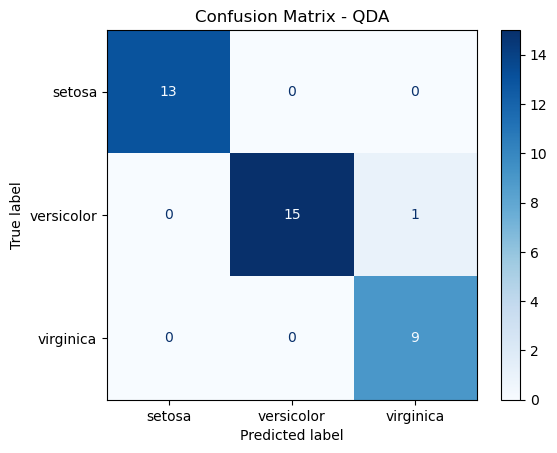

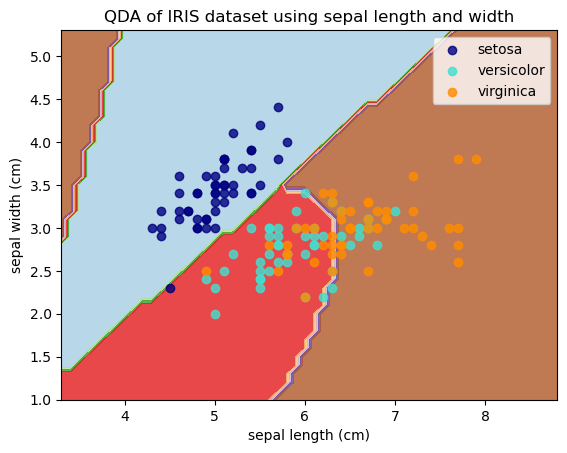

In [61]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)
# Calculate accuracy on the test set
accuracy_qda = qda.score(X_test, y_test)
print(f'QDA Accuracy: {accuracy_qda:.2f}')
# Predicting the test set results
y_pred_qda = qda.predict(X_test)

qda.fit(X, y)


# Confusion Matrix for QDA
cm_qda = confusion_matrix(y_test, y_pred_qda)
disp_qda = ConfusionMatrixDisplay(confusion_matrix=cm_qda, display_labels=iris.target_names)
disp_qda.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - QDA")
plt.show()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, color=color, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("QDA of IRIS dataset using sepal length and width")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

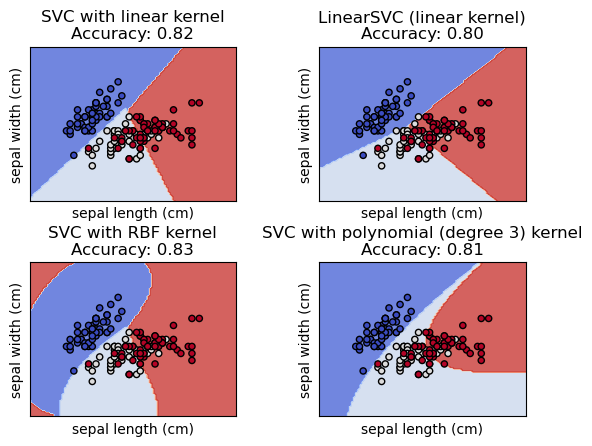

In [69]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    # Fit the model
    clf.fit(X, y)
    
    # Calculate accuracy
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    
    # Display decision boundaries and scatter plot
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2f}")

plt.show()


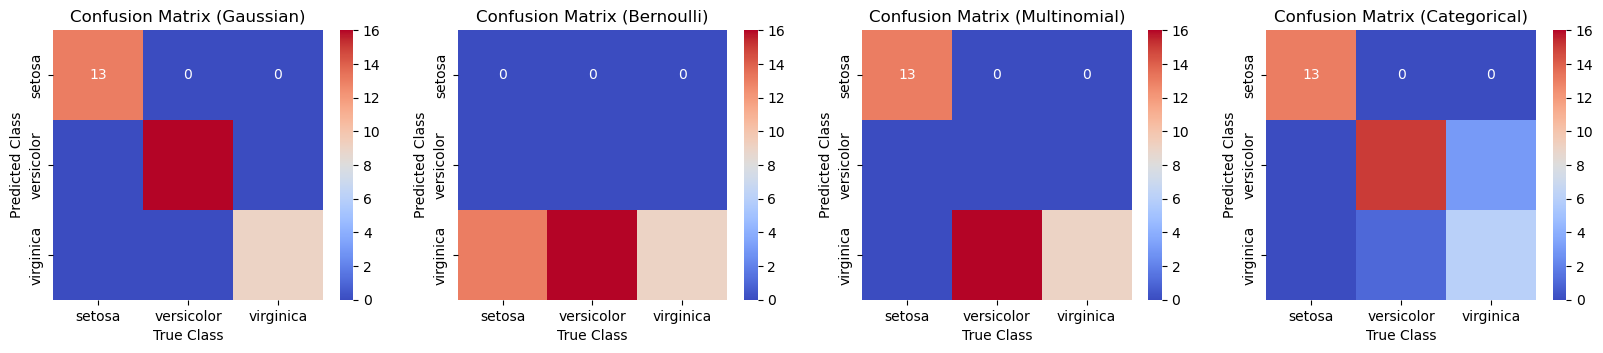

Accuracy from Gaussian distribution: 1.0
Accuracy from Bernoulli distribution: 0.23684210526315788
Accuracy from Multinomial distribution: 0.5789473684210527
Accuracy from Categorical distribution: 0.8947368421052632


In [83]:
#import seaborn as sns
nb=GaussianNB().fit(X_train,y_train)
bnb=BernoulliNB().fit(X_train,y_train)
mnb=MultinomialNB().fit(X_train,y_train)
cnb=CategoricalNB().fit(X_train,y_train)

cm_1=confusion_matrix(nb.predict(X_test),y_test)
cm_2=confusion_matrix(bnb.predict(X_test),y_test)
cm_3=confusion_matrix(mnb.predict(X_test),y_test)
cm_4=confusion_matrix(cnb.predict(X_test),y_test)

x_labels=y_labels=iris['target_names']
fig,ax=plt.subplots(1,4,figsize=(20,3.5))
sns.heatmap(cm1,cmap='coolwarm',annot=True,ax=ax[0],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[0].set_title("Confusion Matrix (Gaussian)")
ax[0].set_xlabel("True Class")
ax[0].set_ylabel("Predicted Class")
sns.heatmap(cm2,cmap='coolwarm',annot=True,ax=ax[1],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[1].set_title("Confusion Matrix (Bernoulli)")
ax[1].set_xlabel("True Class")
ax[1].set_ylabel("Predicted Class")
sns.heatmap(cm3,cmap='coolwarm',annot=True,ax=ax[2],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[2].set_title("Confusion Matrix (Multinomial)")
ax[2].set_xlabel("True Class")
ax[2].set_ylabel("Predicted Class")
sns.heatmap(cm4,cmap='coolwarm',annot=True,ax=ax[3],xticklabels=x_labels,yticklabels=y_labels,vmin=0,vmax=16)
ax[3].set_title("Confusion Matrix (Categorical)")
ax[3].set_xlabel("True Class")
ax[3].set_ylabel("Predicted Class")
plt.show()

sc1=nb.score(X_test,y_test)
sc2=bnb.score(X_test,y_test)
sc3=mnb.score(X_test,y_test)
sc4=cnb.score(X_test,y_test)

print("Accuracy from Gaussian distribution:",sc1)
print("Accuracy from Bernoulli distribution:",sc2)
print("Accuracy from Multinomial distribution:",sc3)
print("Accuracy from Categorical distribution:",sc4)

